# 波士顿房价预测

## 1、数据分析以及可视化

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

In [14]:
dataset = load_boston()
x = dataset.data
target = dataset.target
y = np.reshape(target,(len(target), 1))

In [30]:
boston_date = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston_date['price'] = target

In [33]:
boston_date.get_dtype_counts()

float64    14
dtype: int64

In [34]:
boston_date.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [31]:
boston_date.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
boston_date.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
boston_date.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [37]:
boston_date.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

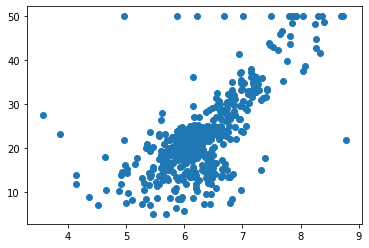

In [39]:
plt.scatter(boston_date["RM"],boston_date["price"])

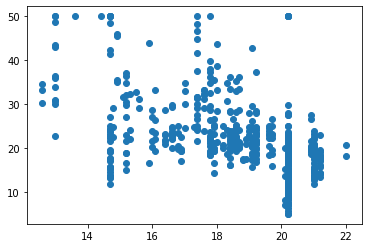

In [41]:
plt.scatter(boston_date["PTRATIO"],boston_date["price"])

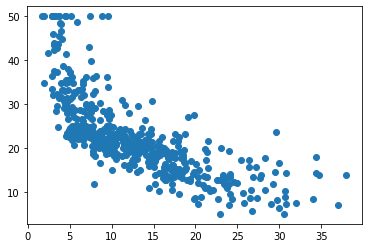

In [42]:
plt.scatter(boston_date["LSTAT"],boston_date["price"])

## 2、线性回归

### 2-1、普通线性回归

In [15]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 31, test_size = 0.2)

In [43]:
print(train_x.shape,train_y.shape)

(404, 13) (404, 1)


In [18]:
std_x = StandardScaler()
train_x_std = std_x.fit_transform(train_x)
test_x_std = std_x.transform(test_x)

In [23]:
lr_normal = LinearRegression()
lr_normal.fit(train_x_std, train_y)
predict_y = lr_normal.predict(test_x_std)
print("MSE: ",mean_squared_error(test_y, predict_y))
print("R2: ",r2_score(test_y, predict_y))

MSE:  16.538367380923752
R2:  0.7849023595572457


### 2-2、对y规范化-线性回归

In [24]:
std_y = StandardScaler()
train_y_std = std_y.fit_transform(train_y)
test_y_std = std_y.transform(test_y)

In [26]:
lr_std_y = LinearRegression()
lr_std_y.fit(train_x_std, train_y_std)
predict_y = std_y.inverse_transform(lr_std_y.predict(test_x_std))
print("MSE: ",mean_squared_error(test_y, predict_y))
print("R2: ",r2_score(test_y, predict_y))

MSE:  16.538367380923745
R2:  0.7849023595572459


In [27]:
sgd = SGDRegressor()
sgd.fit(train_x_std, train_y_std)
predict_y_sgd = std_y.inverse_transform(sgd.predict(test_x_std))
print("MSE: ",mean_squared_error(test_y, predict_y_sgd))
print("R2: ",r2_score(test_y, predict_y_sgd))

MSE:  17.24879565224886
R2:  0.7756625451701186


/Users/supinyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 2-3、numpy实现的线性回归

In [95]:
class liner_Regression:
    """
    x : sample_num * dim
    y : sample_num * 1
    return :
    weight , biase
    """
    def __init__(self, x, y, learningRate = 0.001, epoch = 1000):
        self.x = x
        self.y = y
        self.sample_num = x.shape[0]
        self.dim = x.shape[1]
        self.weight = np.ones(shape=(1, self.dim))
        self.baise = np.array([[1]])
        self.epoch = epoch
        self.learningRate = learningRate
        
    def fit(self):
        for num in range(self.epoch):
            predict_y = np.dot(self.x, self.weight.T) + self.baise
            loss =  (1.0 / 2) * np.dot((self.y - predict_y).T, self.y - predict_y) / self.sample_num
            weight_grad = -1.0 /self.sample_num * np.dot((self.y - predict_y).T, self.x)
            baise_grad = -1.0 /self.sample_num * np.dot((self.y - predict_y).T, np.ones(shape=[self.sample_num, 1]))

            self.weight = self.weight - self.learningRate * weight_grad
            self.baise = self.baise - self.learningRate * baise_grad
            if num % 500 == 0:
                print("loss: ", loss)
    
    def predict(self, test_x):
        return np.dot(test_x, self.weight.T) + self.baise
    

In [96]:
self_linear = liner_Regression(train_x_std, train_y_std, epoch = 12000)

In [97]:
self_linear.fit()

loss:  [[12.31029617]]
loss:  [[1.98136196]]
loss:  [[1.13928829]]
loss:  [[0.73917842]]
loss:  [[0.52578828]]
loss:  [[0.40252083]]
loss:  [[0.32630552]]
loss:  [[0.27643966]]
loss:  [[0.24227901]]
loss:  [[0.21800169]]
loss:  [[0.20023778]]
loss:  [[0.18693465]]
loss:  [[0.17678484]]
loss:  [[0.16892292]]
loss:  [[0.16275703]]
loss:  [[0.15787117]]
loss:  [[0.15396605]]
loss:  [[0.15082203]]
loss:  [[0.14827517]]
loss:  [[0.14620125]]
loss:  [[0.14450493]]
loss:  [[0.14311221]]
loss:  [[0.14196505]]
loss:  [[0.14101752]]


In [98]:
predict_y_self = std_y.inverse_transform(self_linear.predict(test_x_std))

In [99]:
print("MSE: ",mean_squared_error(test_y, predict_y_self))
print("R2: ",r2_score(test_y, predict_y_self))

MSE:  17.48076080782158
R2:  0.7726456114861939


### 2-4、选取部分特征

In [106]:
data = boston_date[['LSTAT','PTRATIO','RM','price']]
y_select = np.array(data['price'])
data = data.drop(['price'],axis=1)
x_select = np.array(data)
train_x_sel, test_x_sel, train_y_sel, test_y_sel = train_test_split(x_select, y_select, random_state = 31, test_size = 0.2)

In [107]:
std_x_sel = StandardScaler()
train_x_sel_std = std_x.fit_transform(train_x_sel)
test_x_sel_std = std_x.transform(test_x_sel)
lr_select = LinearRegression()
lr_select.fit(train_x_sel_std, train_y_sel)
predict_y_sel = lr_select.predict(test_x_sel_std)
print("MSE: ",mean_squared_error(test_y_sel, predict_y_sel))
print("R2: ",r2_score(test_y_sel, predict_y_sel))

MSE:  20.613131629833926
R2:  0.7319060658413352
